In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os


city_data_to_load = "05-Matplotlib/Instructions/Pyber/data/city_data.csv"
ride_data_to_load = "05-Matplotlib/Instructions/Pyber/data/ride_data.csv"


df = pd.read_csv(city_data_to_load)
df2 = pd.read_csv(ride_data_to_load)
df = df.drop_duplicates('city', keep = 'first')

combine_df = df.merge(df2, on = "city")

#sort by city
each_city = combine_df.groupby('city')

#get average fare for each city and round  
fare_avg = round((each_city.mean()['fare']),2)

#get total number of rides per city - count number of unique rides  

total_rides = each_city['ride_id'].count()

#get total of drivers in each city. 
each_city_drivers = (each_city['driver_count'].mean())

city_type = df.set_index('city')['type']



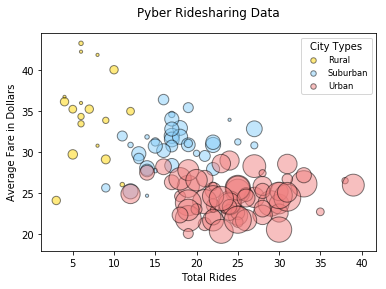

In [90]:
#* Average Fare ($) Per City
#* Total Number of Rides Per City
#* Total Number of Drivers Per City
#* City Type (Urban, Suburban, Rural)


city_info = pd.DataFrame({
    "Total Rides": total_rides,
    "Average Fare": fare_avg,
    "Total Drivers": each_city_drivers,
    "City Type": city_type
})
#colors = ['Lightcoral', 'Lightskyblue', 'Gold']
color_scheme = {'Light Coral':'#F08080', 'Light Sky Blue':'#87CEFA', 'Gold':'#FFD700'}

#city_info.head()


city_info.sort_values('Total Drivers', ascending = False)

urban = city_info[city_info['City Type'] == 'Urban']
suburban = city_info[city_info['City Type'] == 'Suburban']
rural = city_info[city_info['City Type'] == 'Rural']

city_color = {'Urban': color_scheme['Light Coral'], 'Suburban': color_scheme['Light Sky Blue'], 'Rural': color_scheme['Gold']}

#city_info.head(30)
#building scatterplot based on the 3 city types
plt.scatter(rural['Total Rides'], rural['Average Fare'], s = rural['Total Drivers']*10, color = city_color['Rural'], edgecolor = 'black', label = 'Rural', alpha = .5)
plt.scatter(suburban['Total Rides'], suburban['Average Fare'], s = suburban['Total Drivers']*10, color = city_color['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .5)
plt.scatter(urban['Total Rides'], urban['Average Fare'], s = urban['Total Drivers']*10, color = city_color['Urban'], edgecolor = 'black', label = 'Urban', alpha = .5)

#titling and labeling
plt.title('Pyber Ridesharing Data',y=1.05)
plt.xlabel('Total Rides')
plt.ylabel('Average Fare in Dollars')

#create legend, resize to make all same size
lgnd = plt.legend(fontsize="small", mode="Expanded",
                 numpoints=1, scatterpoints=1,
                 loc="best", title="City Types",
                 labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

plt.show()

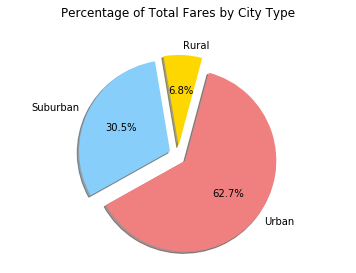

In [86]:
#* % of Total Fares by City Type

by_type = combine_df.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

fare_sum = by_type.sum()['fare']

labels = fare_sum.index


# Pie chart, where the slices will be ordered and plotted counter-clockwise:

colors = ['Gold', 'Lightskyblue', 'Lightcoral']
explode = (.1, 0.1, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(fare_sum, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=75)
ax1.axis('equal')  
plt.title("Percentage of Total Fares by City Type",y=1.1)


plt.show()

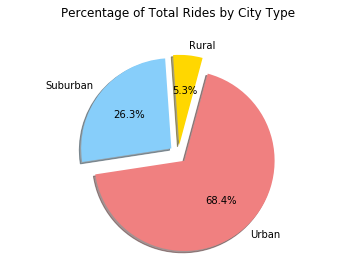

In [87]:
#* % of Total Rides by City Type

city_type_sum = by_type.count()['ride_id']

labels = city_type_sum.index


# Pie chart, where the slices will be ordered and plotted counter-clockwise:

colors = ['Gold', 'Lightskyblue', 'Lightcoral']
explode = (.1, 0.1, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(city_type_sum, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=75)
ax1.axis('equal')  
plt.title("Percentage of Total Rides by City Type",y=1.1)
plt.show()



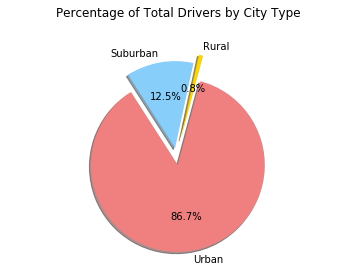

In [88]:
#* % of Total Drivers by City Type

driver_type_sum = by_type.sum()['driver_count']

labels = driver_type_sum.index

colors = ['Gold', 'Lightskyblue', 'Lightcoral']
explode = (.2, 0.1, .1) 

fig1, ax1 = plt.subplots()
ax1.pie(driver_type_sum, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=75)
ax1.axis('equal')  
plt.title("Percentage of Total Drivers by City Type",y=1.1)
plt.show()

In [89]:
print("""Three Observable Trends based on the data: 
Urban rides by far were the highest volume of rides, and were the largest source of revenue,
despite having a comparatively low average fare compared to Suburban and Rural rides.  
Clearly, the data shows that repeat customers heavily drive revenue so a potential loyalty 
program to further entice customers to use the service on an ongoing basis could be helpful.

Urban rides make up 68% of rides but over 86% of drivers are in urban areas.  While a 
surplus of drivers may be helpful for customers, marketing efforts to get more drivers 
could potentially be better utilized by attracting and retaining drivers in suburban and 
rural areas.  

Further, rural rides make up 5% of rides but only .8% of drivers.  Rural rides also 
represent some of the highest average fares, despite being a small market.  More 
research could analyze whether there is a potential shortage of drivers in rural areas 
and if marketing to get more drivers would lead to increases in revenue in these markets.""")   



Three Observable Trends based on the data: 
Urban rides by far were the highest volume of rides, and were the largest source of revenue,
despite having a comparatively low average fare compared to Suburban and Rural rides.  
Clearly, the data shows that repeat customers heavily drive revenue so a potential loyalty 
program to further entice customers to use the service on an ongoing basis could be helpful.

Urban rides make up 68% of rides but over 86% of drivers are in urban areas.  While a 
surplus of drivers may be helpful for customers, marketing efforts to get more drivers 
could potentially be better utilized by attracting and retaining drivers in suburban and 
rural areas.  

Further, rural rides make up 5% of rides but only .8% of drivers.  Rural rides also 
represent some of the highest average fares, despite being a small market.  More 
research could analyze whether there is a potential shortage of drivers in rural areas 
and if marketing to get more drivers would lead to in